<a href="https://colab.research.google.com/github/Sukantanath108/Data-Science-and-ML-journey/blob/main/Housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
house_data = pd.read_csv('data.csv')

In [5]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
house_data['CHAS'].value_counts() #houses that are near charles river (does this have any impact on housing prices?)

,count
CHAS,
0,471
1,35


In [9]:
%matplotlib inline

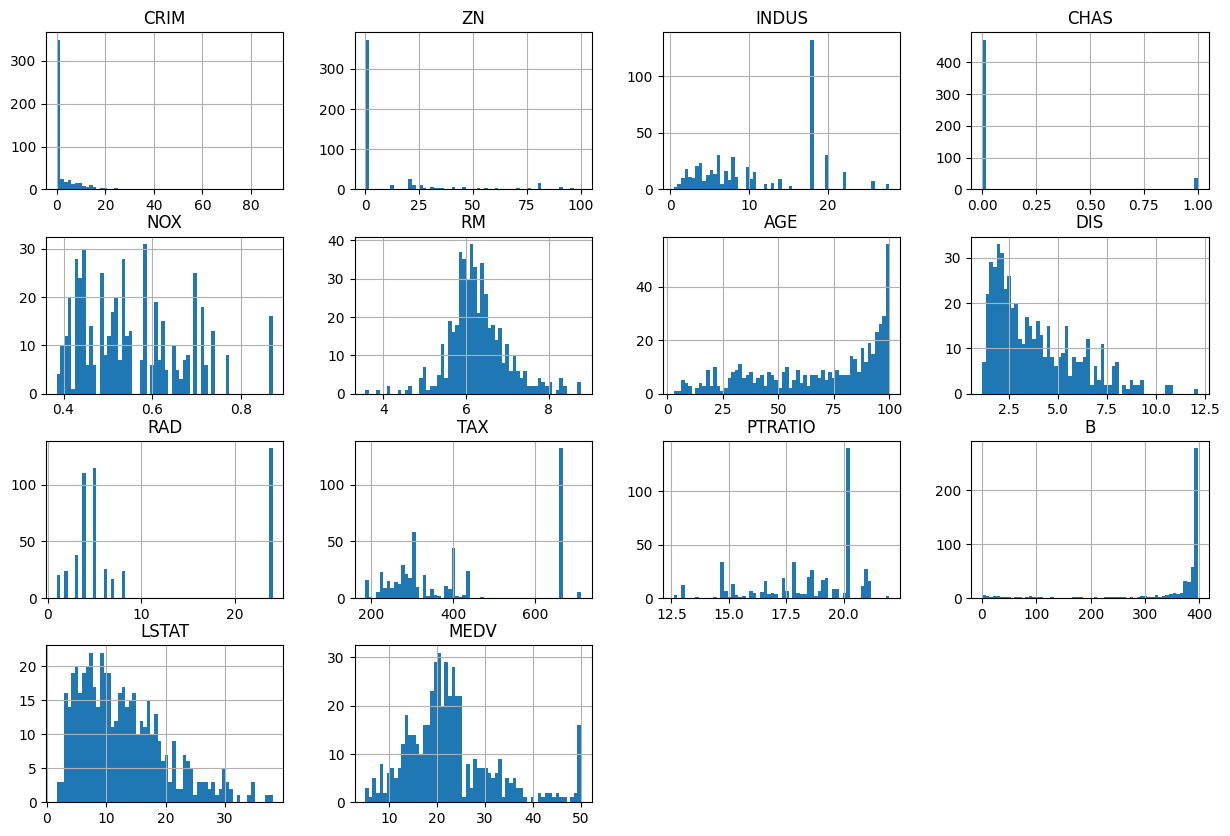

In [10]:
house_data.hist(bins = 60, figsize=(15,10))
plt.show()

In [11]:
'''
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2 , random_state=43)
for train_index , test_index in split.split(house_data,house_data['CHAS']):
    strat_train_set = house_data.loc[train_index]
    strat_test_set = house_data.loc[test_index]
'''
# for a balanced split before spliting data

"\nfrom sklearn.model_selection import StratifiedShuffleSplit\nsplit = StratifiedShuffleSplit(n_splits=1, test_size = 0.2 , random_state=43)\nfor train_index , test_index in split.split(house_data,house_data['CHAS']):\n    strat_train_set = house_data.loc[train_index]\n    strat_test_set = house_data.loc[test_index]\n"

In [12]:
# Correlations
corr_matrix = house_data.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.696169
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


(+) values shows that, changing these features will affect the price changes surely.

example : if house age increases, the prices tends to go down

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='INDUS', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='INDUS', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='INDUS'>,
        <Axes: xlabel='RM', ylabel='INDUS'>,
        <Axes: xlabel='ZN', ylabel='INDUS'>,
        <Axes: xlabel='INDUS', ylabel='INDUS'>,
        <Axes: xlabel='LSTAT', ylabel='INDUS'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
       

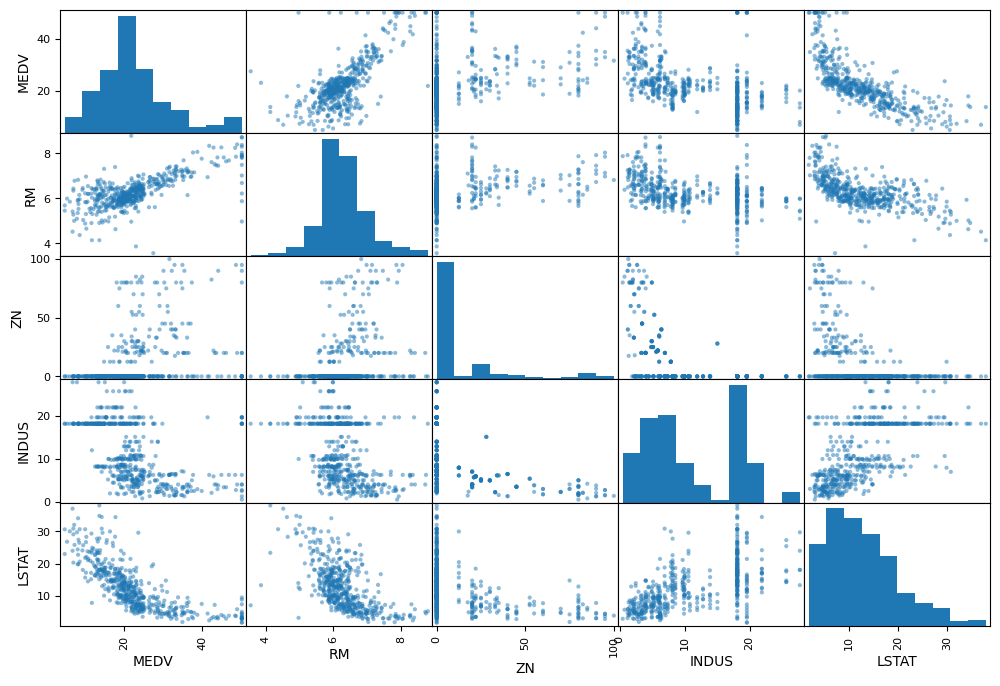

In [13]:
from pandas.plotting import scatter_matrix
attributes = [ "MEDV" ,"RM" , "ZN" , "INDUS" , "LSTAT"]
scatter_matrix(house_data[attributes] , figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

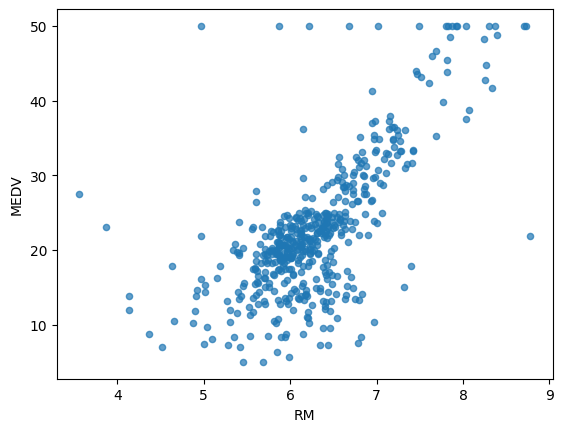

In [14]:
house_data.plot(kind='scatter', x = 'RM' , y = 'MEDV' , alpha = 0.7)

Here some values are capped at 50 even if rm if 5 or 9.whyy? ask team ( are they outlier? )

<Axes: xlabel='LSTAT', ylabel='MEDV'>

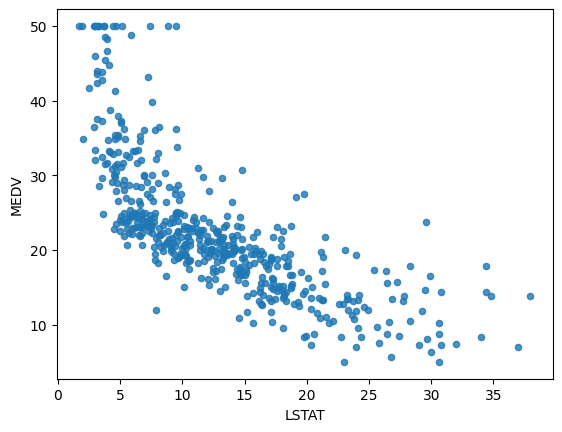

In [15]:
house_data.plot(kind='scatter', x = 'LSTAT' , y='MEDV' , alpha= 0.8)

# Attribute combo ( feature merge )

In [16]:
house_data['TAXRM'] = house_data['TAX']/house_data["RM"]

In [17]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [18]:
hm = house_data.corr()
hm['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.696169
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


<Axes: xlabel='TAXRM', ylabel='MEDV'>

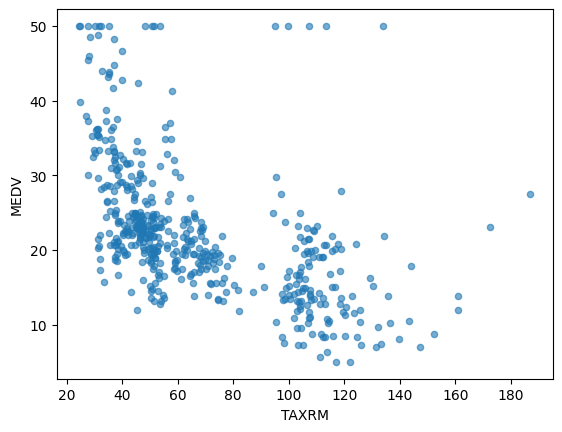

In [19]:
# we got a new feature with a good negative correlation
house_data.plot(kind='scatter', x = "TAXRM" , y = 'MEDV' , alpha = 0.6)

DEALING with missing values


In [20]:
# a =  house_data.dropna(subset="RM")
# drops 5 missing values and shape becomes 501 form 506 for RM attribute


In [21]:
# med = house_data["RM"].median()
# house_data["RM"].fillna(med)
# filled with median value

In [22]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'median')
impute.fit(house_data)

SimpleImputer(strategy='median')

In [23]:
impute.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20800000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.36078965e+01])

In [24]:
new_tr = impute.transform(house_data)
new_house_data = pd.DataFrame(new_tr , columns=house_data.columns)
new_house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.775162
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.322097
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.838179
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.607897
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,97.919933
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


# Feature Scaling

CREATING A PIPELINE

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pip = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    # add as many as pipeline needed
    ('std_scaler',StandardScaler())
])

In [26]:
tr_house = my_pip.fit_transform(new_house_data)

In [27]:
tr_house

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.0755623 ,
         0.15968566, -0.69528172],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.49243937,
        -0.10152429, -0.92953909],
       [-0.41734159, -0.48772236, -0.59338101, ..., -1.2087274 ,
         1.32424667, -1.05761222],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ..., -0.98304761,
         0.14880191, -0.88334897],
       [-0.40776407, -0.48772236,  0.11573841, ..., -0.86530163,
        -0.0579893 , -0.8498462 ],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.66905833,
        -1.15724782, -0.68714457]])

In [28]:
tr_house = pd.DataFrame(tr_house , columns=new_house_data.columns)

In [29]:
tr_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.415455,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686,-0.695282
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.195904,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524,-0.929539
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.285105,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247,-1.057612
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.018507,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758,-1.120184
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.230930,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503,-1.141320


In [30]:
X = tr_house.drop('MEDV',axis=1)
y = tr_house['MEDV']

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [33]:
X_train.shape , y_train.shape

((354, 14), (354,))

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,model.predict(X_train))
rmse = np.sqrt(mse)
print(rmse)

0.4587123560093605


In [36]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(X_train,y_train)


DecisionTreeRegressor()

In [37]:
from sklearn.model_selection import cross_val_score
scores_1 = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_scores_1 = np.sqrt(-scores_1)

In [38]:
rmse_scores_1

array([0.56722167, 0.64621916, 0.48690843, 0.58538469, 0.53322021,
       0.366417  , 0.49906806, 0.35998014, 0.353223  , 0.340919  ])

In [39]:
def print_scores(scores_1):
  print("score:" ,scores_1)
  print("mean:", scores_1.mean())
  print("std:" ,scores_1.std())

In [40]:
print_scores(rmse_scores_1)

score: [0.56722167 0.64621916 0.48690843 0.58538469 0.53322021 0.366417
 0.49906806 0.35998014 0.353223   0.340919  ]
mean: 0.4738561347329762
std: 0.10579716443536372


In [41]:
lin_score = model.score(X_test,y_test)
print(lin_score)


0.7784643022448358


In [42]:
tree_score = model1.score(X_test,y_test)
print(tree_score)


0.8424808853711505


In [43]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor()
rand.fit(X_train,y_train)


RandomForestRegressor()

In [44]:
rand_score = rand.score(X_test,y_test)
print(rand_score)

0.8699586674933323
